In [26]:
import pandas as pd 
import numpy as np
import csv
import os.path
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#Read data from the csv file 
summer2019 = pd.read_csv(r'./Data/2019-summer-match-data.csv', dtype = np.array(np.dtype('float64')))
spring2019 = pd.read_csv(r'./Data/2019-spring-match-data.csv', dtype = np.array(np.dtype('float64')))
summer2018 = pd.read_csv(r'./Data/2018-summer-match-data.csv', dtype = np.array(np.dtype('float64')))
worlds2018 = pd.read_csv(r'./Data/2018-worlds-match-data.csv', dtype = np.array(np.dtype('float64')))
spring2018 = pd.read_csv(r'./Data/2018-spring-match-data.csv', dtype = np.array(np.dtype('float64')))

In [ ]:
#Drop the unnecessary columns
summer2019 = summer2019.drop(['split','date','ban1','ban2','ban3','ban4','ban5','gameid','url','doubles','triples','quadras','pentas','champion','player','position'], axis=1)
spring2019 = spring2019.drop(['split','date','ban1','ban2','ban3','ban4','ban5','gameid','url','doubles','triples','quadras','pentas','champion','player','position'], axis=1)
summer2018 = summer2018.drop(['split','date','ban1','ban2','ban3','ban4','ban5','gameid','url','doubles','triples','quadras','pentas','champion','player','position'], axis=1)
worlds2018 = worlds2018.drop(['split','date','ban1','ban2','ban3','ban4','ban5','gameid','url','doubles','triples','quadras','pentas','champion','player','position'], axis=1)
spring2018 = spring2018.drop(['split','date','ban1','ban2','ban3','ban4','ban5','gameid','url','doubles','triples','quadras','pentas','champion','player','position'], axis=1)

In [ ]:
# #Convert the columns to a list
summer2019['playerid'] = summer2019['playerid'].astype(str).astype(int)
# #Get the value of 100 and 200 representing team
summer2019 = summer2019.loc[(summer2019['playerid'] >= 100) & (summer2019['playerid'] <= 200)]
# #Drop NaN columns
summer2019 = summer2019.dropna()

In [ ]:
# #Double checking if the number of 100s and 200s (representing team pair) matches up to a game or not
listValSum19 = summer2018['playerid'].tolist()
listValSum19_100 = [num for num in listValSum19 if num == 100]
listValSum19_200 = [num for num in listValSum19 if num == 200]
len(listValSum19_100) == len(listValSum19_200)

In [ ]:
#Convert the columns to a list
spring2019['playerid'] = spring2019['playerid'].astype(str).astype(int)
#Get the value of 100 and 200 representing team
spring2019 = spring2019.loc[(spring2019['playerid'] >= 100) & (spring2019['playerid'] <= 200)]
#Drop NaN columns
spring2019 = spring2019.dropna()

In [ ]:
spring2019

In [ ]:
#Cross-checking data
listValSpr19 = spring2019['playerid'].tolist()
listValSpr19_100 = [num for num in listValSpr19 if num == 100]
listValSpr19_200 = [num for num in listValSpr19 if num == 200]
len(listValSpr19_100) == len(listValSpr19_200)

In [ ]:
summer2018['playerid'] = summer2018['playerid'].astype(str).astype(int)
summer2018 = summer2018.loc[(summer2018['playerid'] >= 100) & (summer2018['playerid'] <= 200)]
summer2018 = summer2018.dropna()

In [ ]:
summer2018

In [ ]:
listValSum18 = summer2018['playerid'].tolist()
listValSum18_100 = [num for num in listValSum18 if num == 100]
listValSum18_200 = [num for num in listValSum18 if num == 200]
len(listValSum18_100) == len(listValSum18_200)

In [ ]:
worlds2018['playerid'] = worlds2018['playerid'].astype(str).astype(int)
worlds2018 = worlds2018.loc[(worlds2018['playerid'] >= 100) & (worlds2018['playerid'] <= 200)]
worlds_columns = worlds2018.isna().any()
worlds_columns = pd.DataFrame({'col_names':worlds_columns.index,'col_value':worlds_columns.values})
worlds_columns['col_names'].loc[worlds_columns['col_value'] == True]
worlds2018 = worlds2018.dropna()

In [ ]:
worlds2018

In [ ]:
#Cross-checking data
listValWrld18 = worlds2018['playerid'].tolist()
listValWrld18_100 = [num for num in listValWrld18 if num == 100]
listValWrld18_200 = [num for num in listValWrld18 if num == 200]
len(listValWrld18_100) == len(listValWrld18_200)

In [ ]:
spring2018['playerid'] = spring2018['playerid'].astype(str).astype(int)
spring2018 = spring2018.loc[(spring2018['playerid'] >= 100) & (spring2018['playerid'] <= 200)]
spring_2018_columns = spring2018.isna().any()
spring_2018_columns = pd.DataFrame({'col_names':spring_2018_columns.index,'col_value':spring_2018_columns.values})
spring_2018_columns['col_names'].loc[spring_2018_columns['col_value'] == True]
spring2018 = spring2018.dropna()

In [ ]:
spring2018

In [ ]:
#Cross-checking data
listValSpr18 = spring2018['playerid'].tolist()
listValSpr18_100 = [num for num in listValSpr18 if num == 100]
listValSpr18_200 = [num for num in listValSpr18 if num == 200]
len(listValSpr18_100) == len(listValSpr18_200)

In [ ]:
#Drop unnecessary columns
summer2019 = summer2019.drop(['league','week','game','patchno','playerid'],axis = 1)
#Choose columns that are important
column_names = ['gamelength','k','d','a','teamkills','teamdeaths',
                  'fbtime','kpm','fdtime','teamdragkills','heraldtime',
                  'fttime','teamtowerkills','fbarontime','dmgtochampsperminute',
                 'visionwards','visiblewardclearrate','invisiblewardclearrate',
                 'totalgold','earnedgpm','goldspent','minionkills','monsterkills',
                 'monsterkillsownjungle','monsterkillsenemyjungle','cspm']

In [ ]:
#Get the value from each columns and convert to int. We concat all the data from each season
all_games_data = pd.concat([summer2019,spring2019,summer2018,worlds2018,spring2018],sort=False)
for i in column_names:
    all_games_data[i] = all_games_data[i].astype(str).astype(float).astype(int)

In [ ]:
#pivot the table by using the team name as the indexing and the value are the average of the data with similar name
all_matches_pivot = all_games_data.pivot_table(index = ['team'], margins = True , aggfunc = np.mean)

In [ ]:
#Dataframe with each team and their average stats
all_matches_pivot.columns.values

In [ ]:
#Drop the unnecessary columns and select only the one that we want
all_games_data = all_games_data.drop(['league','week','game','patchno','playerid'],axis = 1)
all_games_data = all_games_data[['team','result','gamelength','k','d','a','teamkills','teamdeaths',
                 'fbtime','kpm','fdtime','teamdragkills','heraldtime',
                 'fttime','teamtowerkills','fbarontime','dmgtochampsperminute',
                'visionwards','totalgold','earnedgpm','goldspent','minionkills','monsterkills',
                'monsterkillsownjungle','monsterkillsenemyjungle','cspm']]

In [ ]:
all_games_data

In [ ]:
#construct a new dataframe with team and result. All other entries are empty
final_games_data = all_games_data[['team', 'result']]
listVal = ['diff_assists','diff_cspm','diff_damage','diff_dmgperminute','diff_gpm','diff_fbaron_time','diff_first_blood',
          'diff_firstdeath','diff_first_tower','diff_match_duration','diff_gold_spent','diff_herald_time','diff_kills',
          'diff_kpm','diff_minion_kills','diff_monster_kills','diff_drag_kills','diff_tower_kills','totalgold', 'diff_vision_wards']
final_games_data['diff_assists'] = 0
final_games_data['diff_cspm'] = 0
final_games_data['diff_damage'] = 0
final_games_data['diff_dmgperminute'] = 0
final_games_data['diff_gpm'] = 0
final_games_data['diff_fbaron_time'] = 0
final_games_data['diff_first_blood'] = 0
final_games_data['diff_firstdeath'] = 0
final_games_data['diff_first_tower'] = 0
final_games_data['diff_match_duration'] = 0
final_games_data['diff_gold_spent'] = 0
final_games_data['diff_herald_time'] = 0
final_games_data['diff_kills'] = 0
final_games_data['diff_kpm'] = 0
final_games_data['diff_minion_kills'] = 0
final_games_data['diff_drag_kills'] = 0
final_games_data['diff_tower_kills'] = 0
final_games_data['totalgold'] = 0
final_games_data['diff_vision_wards'] = 0


In [ ]:
#Reset the indexing for the two dataframe because we want it to be 0-index based
final_games_data.reset_index(inplace = True, drop = True)
all_matches_pivot.reset_index(inplace = True)

In [ ]:
#Construct a map with team name and their corresponding number
listTeam = all_matches_pivot['team'].tolist()
team_map = {}
keys = range(len(listTeam))
for i in keys:
    team_map[listTeam[i]] = i

#A function that takes 4 params, team names and indexes. It subtract the averages from one team to another and add it
# to the current dataframe
def findDifference(team1, team2,i, j):
    team1_ix = team_map[team1]
    team2_ix = team_map[team2]
    value1 = 1;
    value2 = 1;
    
    final_games_data.loc[i, 'diff_assists'] = value1 * (all_matches_pivot.loc[team1_ix, 'a'] - all_matches_pivot.loc[team2_ix, 'a']) 
    final_games_data.loc[j, 'diff_assists'] = value2 * (all_matches_pivot.loc[team1_ix, 'a'] - all_matches_pivot.loc[team2_ix, 'a'])

    final_games_data.loc[i, 'diff_cspm'] = value1 * (all_matches_pivot.loc[team1_ix, 'cspm'] - all_matches_pivot.loc[team2_ix, 'cspm'])
    final_games_data.loc[j, 'diff_cspm'] = value2 * (all_matches_pivot.loc[team1_ix, 'cspm'] - all_matches_pivot.loc[team2_ix, 'cspm'])

    final_games_data.loc[i, 'diff_damage'] = value1 * (all_matches_pivot.loc[team1_ix, 'd'] - all_matches_pivot.loc[team2_ix, 'd'])
    final_games_data.loc[j, 'diff_damage'] = value2 * (all_matches_pivot.loc[team1_ix, 'd'] - all_matches_pivot.loc[team2_ix, 'd'])
    
    final_games_data.loc[i, 'diff_dmgperminute'] = value1 * (all_matches_pivot.loc[team1_ix, 'dmgtochampsperminute'] - all_matches_pivot.loc[team2_ix, 'dmgtochampsperminute'])
    final_games_data.loc[j, 'diff_dmgperminute'] = value2 * (all_matches_pivot.loc[team1_ix, 'dmgtochampsperminute'] - all_matches_pivot.loc[team2_ix, 'dmgtochampsperminute'])   

    final_games_data.loc[i, 'diff_gpm'] = value1 * (all_matches_pivot.loc[team1_ix, 'earnedgpm'] - all_matches_pivot.loc[team2_ix, 'earnedgpm'])
    final_games_data.loc[j, 'diff_gpm'] = value2 * (all_matches_pivot.loc[team1_ix, 'earnedgpm'] - all_matches_pivot.loc[team2_ix, 'earnedgpm'])
    
    final_games_data.loc[i, 'diff_fbaron_time'] = value1 * (all_matches_pivot.loc[team1_ix, 'fbarontime'] - all_matches_pivot.loc[team2_ix, 'fbarontime'])
    final_games_data.loc[j, 'diff_fbaron_time'] = value2 * (all_matches_pivot.loc[team1_ix, 'fbarontime'] - all_matches_pivot.loc[team2_ix, 'fbarontime'])
    
    final_games_data.loc[i, 'diff_first_blood'] = value1 * (all_matches_pivot.loc[team1_ix, 'fbtime'] - all_matches_pivot.loc[team2_ix, 'fbtime'])
    final_games_data.loc[j, 'diff_first_blood'] = value2 * (all_matches_pivot.loc[team1_ix, 'fbtime'] - all_matches_pivot.loc[team2_ix, 'fbtime'])
    
    final_games_data.loc[i, 'diff_firstdeath'] = value1 * (all_matches_pivot.loc[team1_ix, 'fdtime'] - all_matches_pivot.loc[team2_ix, 'fdtime'])
    final_games_data.loc[j, 'diff_firstdeath'] = value2 * (all_matches_pivot.loc[team1_ix, 'fdtime'] - all_matches_pivot.loc[team2_ix, 'fdtime'])
    
    final_games_data.loc[i, 'diff_first_tower'] = value1 * (all_matches_pivot.loc[team1_ix, 'fttime'] - all_matches_pivot.loc[team2_ix, 'fttime'])
    final_games_data.loc[j, 'diff_first_tower'] = value2 * (all_matches_pivot.loc[team1_ix, 'fttime'] - all_matches_pivot.loc[team2_ix, 'fttime'])
    
    final_games_data.loc[i, 'diff_match_duration'] = value1 * (all_matches_pivot.loc[team1_ix, 'gamelength'] - all_matches_pivot.loc[team2_ix, 'gamelength'])
    final_games_data.loc[j, 'diff_match_duration'] = value2 * (all_matches_pivot.loc[team1_ix, 'gamelength'] - all_matches_pivot.loc[team2_ix, 'gamelength'])
    
    final_games_data.loc[i, 'diff_gold_spent'] = value1 * (all_matches_pivot.loc[team1_ix, 'goldspent'] - all_matches_pivot.loc[team2_ix, 'goldspent'])
    final_games_data.loc[j, 'diff_gold_spent'] = value2 * (all_matches_pivot.loc[team1_ix, 'goldspent'] - all_matches_pivot.loc[team2_ix, 'goldspent'])
    
    final_games_data.loc[i, 'diff_herald_time'] = value1 * (all_matches_pivot.loc[team1_ix, 'heraldtime'] - all_matches_pivot.loc[team2_ix, 'heraldtime'])
    final_games_data.loc[j, 'diff_herald_time'] = value2 * (all_matches_pivot.loc[team1_ix, 'heraldtime'] - all_matches_pivot.loc[team2_ix, 'heraldtime'])
    
    final_games_data.loc[i, 'diff_kills'] = value1 * (all_matches_pivot.loc[team1_ix, 'k'] - all_matches_pivot.loc[team2_ix, 'k'])
    final_games_data.loc[j, 'diff_kills'] = value2 * (all_matches_pivot.loc[team1_ix, 'k'] - all_matches_pivot.loc[team2_ix, 'k'])

    final_games_data.loc[i, 'diff_kpm'] = value1 * (all_matches_pivot.loc[team1_ix, 'kpm'] - all_matches_pivot.loc[team2_ix, 'kpm'])
    final_games_data.loc[j, 'diff_kpm'] = value2 * (all_matches_pivot.loc[team1_ix, 'kpm'] - all_matches_pivot.loc[team2_ix, 'kpm']) * (-1)
    
    final_games_data.loc[i, 'diff_minion_kills'] = value1 * (all_matches_pivot.loc[team1_ix, 'minionkills'] - all_matches_pivot.loc[team2_ix, 'minionkills'])
    final_games_data.loc[j, 'diff_minion_kills'] = value2 * (all_matches_pivot.loc[team1_ix, 'minionkills'] - all_matches_pivot.loc[team2_ix, 'minionkills'])

    final_games_data.loc[i, 'diff_monster_kills'] = value1 * (all_matches_pivot.loc[team1_ix, 'monsterkills'] - all_matches_pivot.loc[team2_ix, 'monsterkills'])
    final_games_data.loc[j, 'diff_monster_kills'] = value2 * (all_matches_pivot.loc[team1_ix, 'monsterkills'] - all_matches_pivot.loc[team2_ix, 'monsterkills'])
    
    final_games_data.loc[i, 'diff_drag_kills'] = value1 * (all_matches_pivot.loc[team1_ix, 'teamdragkills'] - all_matches_pivot.loc[team2_ix, 'teamdragkills'])
    final_games_data.loc[j, 'diff_drag_kills'] = value2 * (all_matches_pivot.loc[team1_ix, 'teamdragkills'] - all_matches_pivot.loc[team2_ix, 'teamdragkills']) 

    final_games_data.loc[i, 'diff_tower_kills'] = value1 * (all_matches_pivot.loc[team1_ix, 'teamtowerkills'] - all_matches_pivot.loc[team2_ix, 'teamtowerkills'])
    final_games_data.loc[j, 'diff_tower_kills'] = value2 * (all_matches_pivot.loc[team1_ix, 'teamtowerkills'] - all_matches_pivot.loc[team2_ix, 'teamtowerkills'])

    final_games_data.loc[i, 'totalgold'] = value1 * (all_matches_pivot.loc[team1_ix, 'totalgold'] - all_matches_pivot.loc[team2_ix, 'totalgold'])
    final_games_data.loc[j, 'totalgold'] = value2 * (all_matches_pivot.loc[team1_ix, 'totalgold'] - all_matches_pivot.loc[team2_ix, 'totalgold'])

    final_games_data.loc[i, 'diff_vision_wards'] = value1 * (all_matches_pivot.loc[team1_ix, 'visionwards'] - all_matches_pivot.loc[team2_ix, 'visionwards'])
    final_games_data.loc[j, 'diff_vision_wards'] = value2 * (all_matches_pivot.loc[team1_ix, 'visionwards'] - all_matches_pivot.loc[team2_ix, 'visionwards'])

In [ ]:
#A for loop that carry out the calculation
for x in range(0, len(final_games_data),2):
    print(x, x+1," of ", len(final_games_data))
    try:
        findDifference(final_games_data.loc[x,'team'], final_games_data.loc[x + 1, 'team'], x,x+1)
    except:
        print("Not able to find ", x)

In [ ]:
#export then import
export_csv = final_games_data.to_csv(r'./Data/final_games_data.csv', index = None, header=True)


In [2]:
#import
final_games_data = pd.read_csv(r'./Data/final_games_data.csv', dtype = np.array(np.dtype('float64')))

In [3]:
final_games_data.head()

,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,...,team_Team One e-Sports,team_Team SoloMid,team_Unicorns of Love,team_Uppercut,team_Uppercut esports,team_Vega Squadron,team_Vitality,team_Vivo Keyd,team_YouthCREW,team_paiN Gaming
0,1.0,2.680976430976429,0.45496632996632513,0.7967171717171713,128.0197811447813,93.87457912457921,-2.1195286195286194,-1.7933501683501687,0.6792929292929291,-0.04250841750841872,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-4.273148148148145,-0.731481481481481,0.31944444444444464,-179.49074074074088,-105.31018518518522,0.19907407407407263,1.3148148148148149,-0.19444444444444464,0.49074074074074225,...,0,0,0,0,0,0,0,0,0,0
2,1.0,11.323076923076925,-0.8009615384615358,-0.0807692307692296,395.7249999999999,147.99903846153848,0.1009615384615401,-1.0019230769230774,-1.328846153846154,-0.044230769230770406,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.812781278127815,0.9521827182718283,0.4992124212421256,297.8568856885688,89.44093159315935,-0.3189693969396963,-0.7780153015301536,0.6504275427542741,0.28859135913591416,...,0,0,0,0,0,0,0,0,0,0
4,1.0,-0.0952380952380949,0.5481074481074515,0.003601953601952701,55.483150183149974,-2.6740537240536923,0.02161172161171976,-0.27008547008547,-0.8297924297924304,0.4568376068376061,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#checking if cols has null val
final_games_data[final_games_data.isnull().any(axis=1)].count()

result                         0
diff_assists                   0
diff_cspm                      0
diff_damage                    0
diff_dmgperminute              0
diff_gpm                       0
diff_fbaron_time               0
diff_first_blood               0
diff_firstdeath                0
diff_first_tower               0
diff_match_duration            0
diff_gold_spent                0
diff_herald_time               0
diff_kills                     0
diff_kpm                       0
diff_minion_kills              0
diff_drag_kills                0
diff_tower_kills               0
totalgold                      0
diff_vision_wards              0
diff_monster_kills             0
team_100 Thieves               0
team_100 Thieves Academy       0
team_AHQ e-Sports Club         0
team_Afreeca Freecs            0
team_Alpha Esports             0
team_Ascension Gaming          0
team_BBQ Olivers               0
team_Bombers                   0
team_Bursaspor Esports         0
          

Text(0, 0.5, 'diff_cspm')

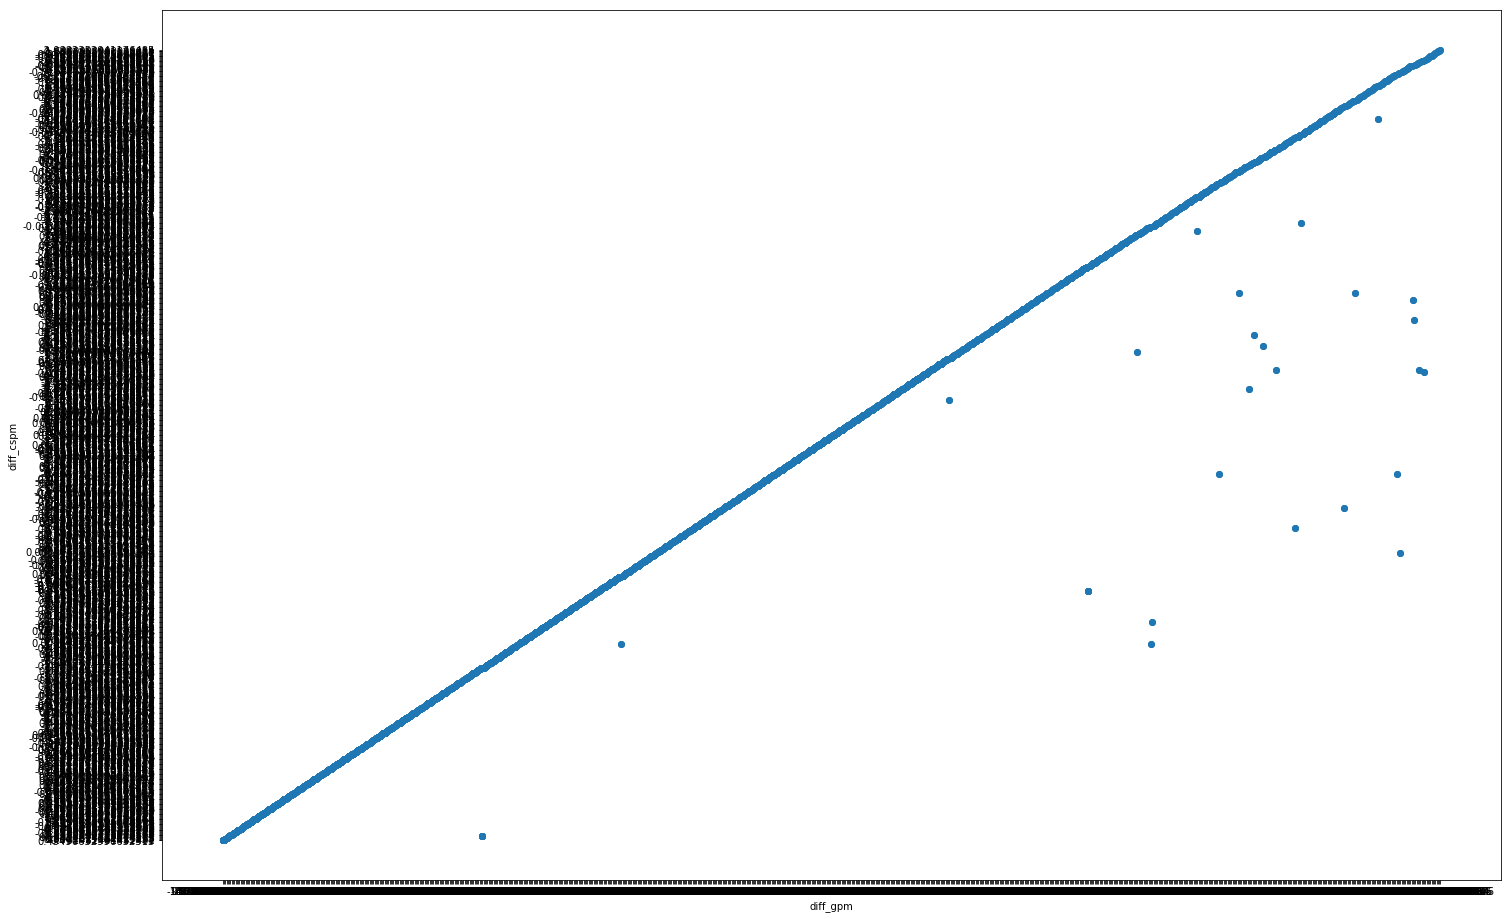

In [5]:
#plotting correlation of gpm and cspm
fig, ax = plt.subplots(figsize=(24,16))
plt.scatter(final_games_data['diff_gpm'], final_games_data['diff_cspm'])

plt.xlabel('diff_gpm')
plt.ylabel('diff_cspm')

In [ ]:
# final_games_data['diff_gpm'], final_games_data['diff_cspm']

In [6]:
#changing types to float
final_games_data['result']=final_games_data['result'].astype('float64')
final_games_data['diff_assists']=final_games_data['diff_assists'].astype('float64')
final_games_data['diff_cspm']=final_games_data['diff_cspm'].astype('float64')
final_games_data['diff_damage']=final_games_data['diff_damage'].astype('float64')
final_games_data['diff_dmgperminute']=final_games_data['diff_dmgperminute'].astype('float64')
final_games_data['diff_gpm']=final_games_data['diff_gpm'].astype('float64')
final_games_data['diff_fbaron_time']=final_games_data['diff_fbaron_time'].astype('float64')
final_games_data['diff_first_blood']=final_games_data['diff_first_blood'].astype('float64')
final_games_data['diff_firstdeath']=final_games_data['diff_firstdeath'].astype('float64')
final_games_data['diff_first_tower']=final_games_data['diff_first_tower'].astype('float64')
final_games_data['diff_match_duration']=final_games_data['diff_match_duration'].astype('float64')
final_games_data['diff_gold_spent']=final_games_data['diff_gold_spent'].astype('float64')
final_games_data['diff_herald_time']=final_games_data['diff_herald_time'].astype('float64')
final_games_data['diff_kills']=final_games_data['diff_kills'].astype('float64')
final_games_data['diff_kpm']=final_games_data['diff_kpm'].astype('float64')
final_games_data['diff_minion_kills']=final_games_data['diff_minion_kills'].astype('float64')
final_games_data['diff_drag_kills']=final_games_data['diff_drag_kills'].astype('float64')
final_games_data['diff_tower_kills']=final_games_data['diff_tower_kills'].astype('float64')
final_games_data['totalgold']=final_games_data['totalgold'].astype('float64')
final_games_data['diff_vision_wards']=final_games_data['diff_vision_wards'].astype('float64')
final_games_data['diff_monster_kills']=final_games_data['diff_monster_kills'].astype('float64')

In [ ]:
#changed team
#final_games_data['team']=final_games_data['team'].astype(str)

In [7]:
#original correlation
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,...,diff_gold_spent,diff_herald_time,diff_kills,diff_kpm,diff_minion_kills,diff_drag_kills,diff_tower_kills,totalgold,diff_vision_wards,diff_monster_kills
result,1.000000e+00,-1.765132e-17,5.613557e-18,5.494089e-18,-5.818007e-18,-1.914414e-17,-4.378256e-18,8.388017e-18,-1.573796e-18,-2.114264e-17,...,-6.055435e-19,-9.679332e-18,-2.012143e-17,5.157650e-02,-1.147223e-17,1.599093e-18,-2.915321e-18,-1.770983e-17,1.340031e-17,8.112201e-18
diff_assists,-1.765132e-17,1.000000e+00,2.786405e-01,-3.726148e-01,7.408255e-01,8.691769e-01,-1.376039e-01,-2.022544e-01,-6.375675e-03,-1.868917e-02,...,2.204889e-01,5.822275e-02,9.658152e-01,-1.675196e-17,-2.020588e-01,5.581554e-01,8.547205e-01,4.335784e-01,4.146067e-02,5.127963e-01
diff_cspm,5.613557e-18,2.786405e-01,1.000000e+00,-4.981774e-01,3.677950e-01,5.699945e-01,3.583365e-02,1.557467e-01,2.905547e-01,4.114994e-02,...,3.258510e-01,2.110472e-01,2.794837e-01,4.066447e-18,4.052151e-01,3.159810e-01,4.554109e-01,4.538064e-01,-1.466141e-01,5.734080e-01
diff_damage,5.494089e-18,-3.726148e-01,-4.981774e-01,1.000000e+00,-7.450496e-02,-5.032790e-01,-2.498934e-01,-1.787042e-01,-1.876843e-03,3.074317e-02,...,-2.463546e-01,-8.901623e-02,-3.342482e-01,-4.742129e-18,-2.148874e-01,-2.885533e-01,-5.453546e-01,-4.250696e-01,-1.216357e-01,-3.713852e-01
diff_dmgperminute,-5.818007e-18,7.408255e-01,3.677950e-01,-7.450496e-02,1.000000e+00,7.220873e-01,-2.127563e-01,-1.287792e-01,1.698392e-01,7.259805e-03,...,3.180558e-01,1.885338e-01,7.413273e-01,9.050762e-18,-3.008535e-02,4.476658e-01,6.703329e-01,4.462474e-01,-1.217112e-01,5.286090e-01
diff_gpm,-1.914414e-17,8.691769e-01,5.699945e-01,-5.032790e-01,7.220873e-01,1.000000e+00,-2.070652e-01,-1.723219e-01,1.563434e-02,-1.039708e-02,...,1.777083e-01,1.926515e-02,8.914727e-01,8.509003e-20,-1.806130e-01,6.632190e-01,9.397684e-01,4.182525e-01,-1.111364e-01,6.085851e-01
diff_fbaron_time,-4.378256e-18,-1.376039e-01,3.583365e-02,-2.498934e-01,-2.127563e-01,-2.070652e-01,1.000000e+00,3.937172e-01,1.215151e-01,1.209671e-01,...,5.518361e-01,6.823995e-03,-1.435546e-01,-4.965361e-18,6.297506e-01,-1.522664e-02,-9.772971e-02,5.036970e-01,5.001394e-01,2.330310e-01
diff_first_blood,8.388017e-18,-2.022544e-01,1.557467e-01,-1.787042e-01,-1.287792e-01,-1.723219e-01,3.937172e-01,1.000000e+00,1.235657e-01,3.223742e-01,...,3.457805e-01,3.425574e-02,-2.748201e-01,-8.858264e-18,5.005653e-01,2.035684e-02,-8.550196e-02,3.283405e-01,3.409386e-01,1.592918e-01
diff_firstdeath,-1.573796e-18,-6.375675e-03,2.905547e-01,-1.876843e-03,1.698392e-01,1.563434e-02,1.215151e-01,1.235657e-01,1.000000e+00,-5.074451e-02,...,2.943098e-01,4.560673e-01,-1.783720e-02,-9.187574e-18,3.945516e-01,-2.858528e-01,4.004478e-02,2.829700e-01,-9.250161e-03,1.573564e-01
diff_first_tower,-2.114264e-17,-1.868917e-02,4.114994e-02,3.074317e-02,7.259805e-03,-1.039708e-02,1.209671e-01,3.223742e-01,-5.074451e-02,1.000000e+00,...,1.442140e-01,6.571130e-02,-2.519081e-02,-2.095898e-17,1.360525e-01,2.522981e-01,-3.290437e-02,1.363570e-01,1.900092e-01,1.238746e-01


In [20]:
#droping colinear col
final_games_data.drop(['diff_assists','diff_monster_kills','diff_cspm','diff_damage','diff_minion_kills','diff_kills','totalgold'], inplace=True, axis=1)
final_games_data.drop(['diff_tower_kills'], inplace=True, axis=1)

In [13]:
#listing all col
list(final_games_data.columns)

['result',
 'diff_dmgperminute',
 'diff_gpm',
 'diff_fbaron_time',
 'diff_first_blood',
 'diff_firstdeath',
 'diff_first_tower',
 'diff_match_duration',
 'diff_gold_spent',
 'diff_herald_time',
 'diff_kpm',
 'diff_drag_kills',
 'diff_tower_kills',
 'diff_vision_wards',
 'team_100 Thieves',
 'team_100 Thieves Academy',
 'team_AHQ e-Sports Club',
 'team_Afreeca Freecs',
 'team_Alpha Esports',
 'team_Ascension Gaming',
 'team_BBQ Olivers',
 'team_Bombers',
 'team_Bursaspor Esports',
 'team_CLG Academy',
 'team_CNB',
 'team_CNB e-Sports Club',
 'team_Cloud9',
 'team_Cloud9 Academy',
 'team_Clutch Gaming',
 'team_Clutch Gaming Academy',
 'team_Counter Logic Gaming',
 'team_Damwon Gaming',
 'team_Dark Passage',
 'team_DetonatioN FocusMe',
 'team_Dire Wolves',
 'team_Dragon Gate Team',
 'team_EVOS Esports',
 'team_Echo Fox',
 'team_Echo Fox Academy',
 'team_Edward Gaming',
 'team_Excel Esports',
 'team_Fenerbahce Esports',
 'team_Flamengo',
 'team_Flamengo eSports',
 'team_Flash Wolves',
 'te

In [22]:
#looking at correlation for each col
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_match_duration,diff_gold_spent,diff_herald_time,diff_kpm,diff_drag_kills,diff_vision_wards
result,1.000000e+00,-5.818007e-18,-1.914414e-17,-4.378256e-18,8.388017e-18,-1.573796e-18,-2.114264e-17,-1.311392e-17,-6.055435e-19,-9.679332e-18,5.157650e-02,1.599093e-18,1.340031e-17
diff_dmgperminute,-5.818007e-18,1.000000e+00,7.220873e-01,-2.127563e-01,-1.287792e-01,1.698392e-01,7.259805e-03,-7.885112e-02,3.180558e-01,1.885338e-01,9.050762e-18,4.476658e-01,-1.217112e-01
diff_gpm,-1.914414e-17,7.220873e-01,1.000000e+00,-2.070652e-01,-1.723219e-01,1.563434e-02,-1.039708e-02,-3.172508e-01,1.777083e-01,1.926515e-02,8.509003e-20,6.632190e-01,-1.111364e-01
diff_fbaron_time,-4.378256e-18,-2.127563e-01,-2.070652e-01,1.000000e+00,3.937172e-01,1.215151e-01,1.209671e-01,6.953792e-01,5.518361e-01,6.823995e-03,-4.965361e-18,-1.522664e-02,5.001394e-01
diff_first_blood,8.388017e-18,-1.287792e-01,-1.723219e-01,3.937172e-01,1.000000e+00,1.235657e-01,3.223742e-01,4.702660e-01,3.457805e-01,3.425574e-02,-8.858264e-18,2.035684e-02,3.409386e-01
diff_firstdeath,-1.573796e-18,1.698392e-01,1.563434e-02,1.215151e-01,1.235657e-01,1.000000e+00,-5.074451e-02,2.772328e-01,2.943098e-01,4.560673e-01,-9.187574e-18,-2.858528e-01,-9.250161e-03
diff_first_tower,-2.114264e-17,7.259805e-03,-1.039708e-02,1.209671e-01,3.223742e-01,-5.074451e-02,1.000000e+00,1.522450e-01,1.442140e-01,6.571130e-02,-2.095898e-17,2.522981e-01,1.900092e-01
diff_match_duration,-1.311392e-17,-7.885112e-02,-3.172508e-01,6.953792e-01,4.702660e-01,2.772328e-01,1.522450e-01,1.000000e+00,8.563838e-01,2.335859e-01,1.193365e-17,-1.401806e-01,5.238875e-01
diff_gold_spent,-6.055435e-19,3.180558e-01,1.777083e-01,5.518361e-01,3.457805e-01,2.943098e-01,1.442140e-01,8.563838e-01,1.000000e+00,2.452498e-01,-1.310574e-17,1.983663e-01,4.440262e-01
diff_herald_time,-9.679332e-18,1.885338e-01,1.926515e-02,6.823995e-03,3.425574e-02,4.560673e-01,6.571130e-02,2.335859e-01,2.452498e-01,1.000000e+00,-3.914981e-18,-1.120770e-01,-5.343886e-02


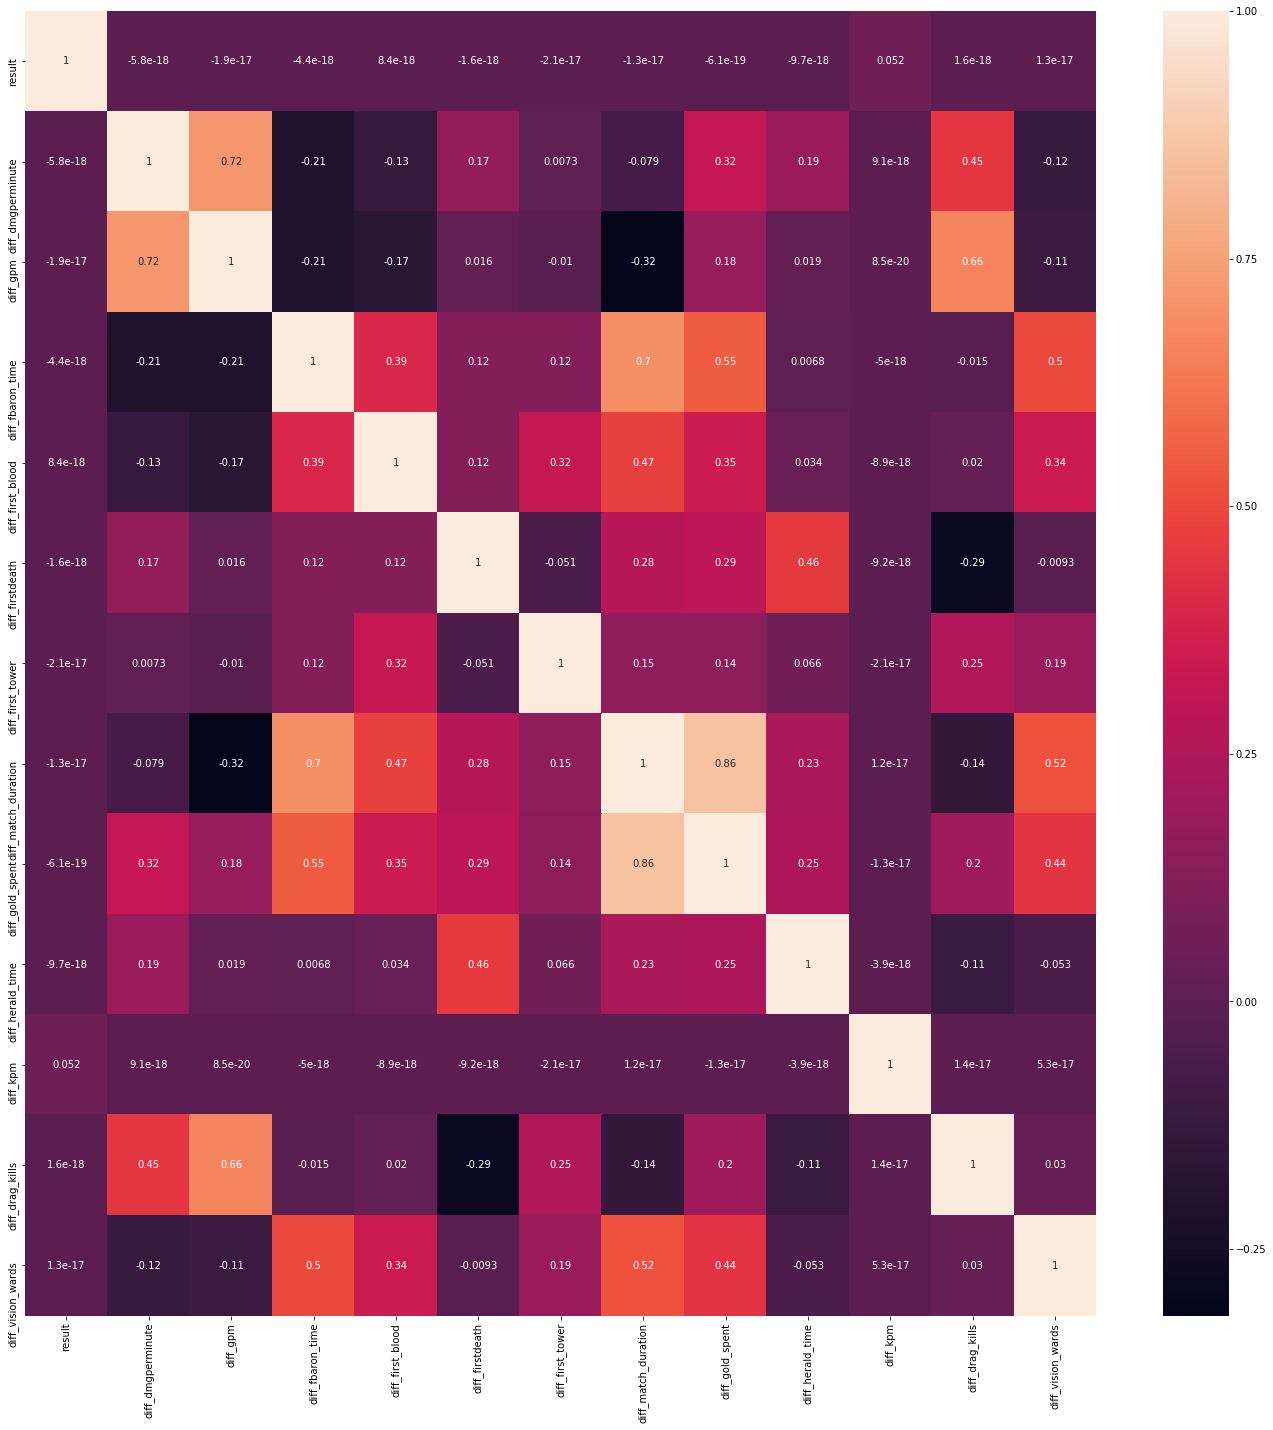

In [23]:
#correlation of each var with each other
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(final_games_data_corr, annot=True)

In [16]:
#convert teams into one hot encoding
le = preprocessing.LabelEncoder()
final_games_data = pd.get_dummies(final_games_data, columns=['team']);
final_games_data.head()

In [27]:
#splitting data to train
from sklearn.model_selection import train_test_split
X=final_games_data.drop('result', axis=1)
Y=final_games_data['result']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [30]:
#shape of train data
x_train.shape, y_train.shape

((4550, 118), (4550,))

In [31]:
##shape of train data
x_test.shape, y_test.shape

((1138, 118), (1138,))

In [41]:
#training using logistical regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [42]:
#prediction using the logistical model from prev cell
y_pred = logistic_model.predict(x_test)

In [47]:
#create dataframe of results
pred_results = pd.DataFrame({'y_test': y_test,
                            'y_pred': y_pred})

In [48]:
#prediction results
pred_results

,y_test,y_pred
2083,1.0,0.0
542,0.0,0.0
553,1.0,0.0
3481,1.0,0.0
5594,1.0,0.0
3426,0.0,0.0
2544,1.0,1.0
1368,1.0,0.0
965,1.0,0.0
1738,1.0,0.0


In [49]:
#total right and wrong of results
final_games_data_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
final_games_data_crosstab

y_test,0.0,1.0
y_pred,,
0.0,280,210
1.0,285,363


In [51]:
#import for scoring the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [52]:
#scores
acc = accuracy_score(y_test, y_pred) #how many of the predicated values did the model get right
prec = precision_score(y_test, y_pred) #how many of the teams that the model thought won actually won
recall = recall_score(y_test, y_pred) #how many of the actual outcomes did the model correctly predict

print("accuracy_score: ", acc)
print("precision_score: ", prec)
print("recall_score: ", recall) #many false negatives

accuracy_score:  0.5650263620386643
precision_score:  0.5601851851851852
recall_score:  0.6335078534031413


In [24]:
final_games_data = final_games_data.sample(frac=1).reset_index(drop=True)
final_games_data.head()

,result,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_match_duration,diff_gold_spent,diff_herald_time,...,team_Team One e-Sports,team_Team SoloMid,team_Unicorns of Love,team_Uppercut,team_Uppercut esports,team_Vega Squadron,team_Vitality,team_Vivo Keyd,team_YouthCREW,team_paiN Gaming
0,0.0,36.622888,9.132274,1.071956,0.394631,0.023652,-0.160055,0.633775,1141.884870,0.067013,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-96.508571,11.356735,-0.068571,-1.475102,0.618776,-0.969796,-0.913469,-1530.038367,0.400000,...,0,0,0,0,0,0,0,0,0,0
2,0.0,31.845519,-61.674528,-0.305425,0.237552,0.261268,-0.218947,0.350367,-642.678721,-0.278695,...,0,0,0,0,0,0,0,0,0,0
3,0.0,178.791667,8.183114,-0.258553,-0.367105,-0.375000,0.167105,0.520614,815.725658,0.479167,...,0,0,0,0,0,0,0,0,0,0
4,0.0,177.512693,16.659034,1.515679,-0.237432,-0.201095,-0.582379,2.444500,4612.554505,-0.596317,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_games_data.to_csv(r'./data/final_games_data.csv', index=False);